In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import seaborn as sns
import tensorflow as tf

In [4]:
from investors import MomentumInvestor
from market_instance import new_market, make_investors

In [66]:
class TradingEnvironment:
    """
    This class represents the RL environment of a single investor. It comprises of a
    portfolio of holdings - which includes a cash position - and the market with its
    players, in this case a bunch of momentum investors with limited reason...;-)
    """
    def __init__(self, config, holdings, market, tx_cost):
        self.config = config
        self.holdings = holdings
        self.market = market
        self.investors = make_investors(config['num_investors'])
        self.tx_cost = tx_cost
        
    def act(self, new_holdings):
        delta = new_holdings - self.normalized_holdings()
        cash = holdings[0] - np.sum(delta) * tx_cost
        
    def trade_a_day(self):
        self.market.open()
        for _ in range(config['num_rounds_per_day']):
            for investor in self.investors:
                investor.act(self.market)
        daily = self.market.close()
        return daily
    
    def total_wealth(self):
        for ticker in self.holdings:
            if ticker == 'cash':
                wealth = self.holdings['cash']
            else:
                size = self.holdings[ticker]
                # positions' values by the closing price
                wealth += size * self.market.price_for(ticker)[1]
        return wealth
    
    def normalized_holdings(self):
        values = {}
        values['cash'] = self.holdings['cash']
        for ticker in self.holdings:
            if ticker != 'cash':
                values[ticker] = holdings[ticker] * self.market.price_for(ticker)[1]
        w = environment.total_wealth()
        return np.array([v/w for _,v in sorted(values.items())])

In [67]:
config = {
    'num_investors': 10,
    'num_rounds_per_day': 3
}

In [68]:
holdings = {'cash': 100000, 'TSLA': 300, 'AAPL': 200, 'MSFT': 400}

In [69]:
market = new_market()
environment = TradingEnvironment(config, holdings, market, 0.002)

## Re-balancing

In [73]:
cur_weights = environment.normalized_holdings()
cur_weights

array([0.08075061, 0.32847815, 0.18298929, 0.40778195])

In [74]:
new_weights = np.array([.1, .3, .4, .2])

In [79]:
vols = ((new_weights - cur_weights) * environment.total_wealth())[:-1]
vols

array([ 4720.51, -6983.67, 53217.34])

In [112]:
holdings = environment.holdings.copy()
del(holdings['cash'])
tickers = sorted(holdings)
tickers

['AAPL', 'MSFT', 'TSLA']

In [101]:
prices = np.array([market.price_for(h) for h in sorted(holdings)])
prices

array([[ 99.212,  99.012],
       [201.581, 201.381],
       [149.781, 149.581]])

In [107]:
prices[:,1]

array([ 99.012, 201.381, 149.581])

In [108]:
# Bid prices:
counts = (vols / prices[:,0]).astype(int)
counts

# Ask prices:
counts = (vols / prices[:,1]).astype(int)
counts

array([ 47, -34, 355])

In [116]:
from stockmarket import Ask, Bid, Investor

# TODO: need to be represented by an investor instance to participate in the market

In [115]:
investor = None

orders = []
for i in range(len(counts)):
    if counts[i] < 0:
        orders.append(Ask(price=prices[i][1], other_party=investor,
                          amount=counts[i], ticker=tickers[i]))
    else:
        orders.append(Bid(price=prices[i][0], other_party=None,
                          amount=counts[i], ticker=tickers[i]))
orders

AttributeError: 'NoneType' object has no attribute 'name'

In [98]:
total_volume = np.sum(counts * prices)
total_volume

50907.865

In [11]:
for _ in range(360):
    daily = environment.trade_a_day()

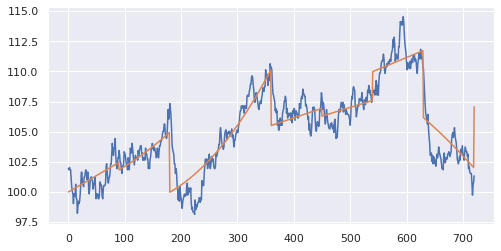

In [13]:
def plot(ticker):
    sns.set(rc={'figure.figsize':(8.0,4.0)})
    h = market.history_for(ticker)
    s = market.stocks[ticker]
    p_open, p_close, p_high, p_low = np.transpose(h)
    t = np.array(range(len(p_open)))
    sns.lineplot(t, p_open);
    sns.lineplot(t, [s.psi(tt) for tt in t]);
plot('AAPL')